In [12]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
keras.__version__

'2.5.0'

In [15]:
tf.__version__

'2.5.0'

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

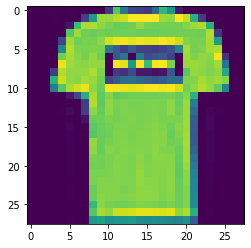

In [19]:
plt.imshow(x_train_full[1])

In [20]:
y_train_full[1]

0

### Data normalization
We then normilize the data dimensions so that they are of approximabely the same scale

In [21]:
x_train_n = x_train_full/255.
x_test_n = x_test/255

In [22]:
x_valid,x_train = x_train_n[:5000],x_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_test_n

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


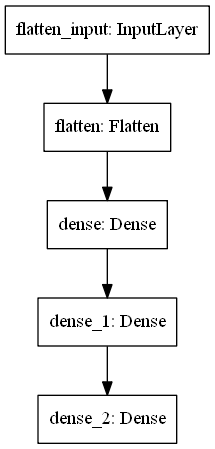

In [30]:
import pydot
keras.utils.plot_model(model)

In [35]:
weights,biases = model.layers[1].get_weights()

In [33]:
weights.shape

(784, 300)

In [37]:
biases.shape

(300,)

In [44]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [61]:
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1354 - accuracy: 0.9529 - val_loss: 0.3021 - val_accuracy: 0.8954
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1342 - accuracy: 0.9532 - val_loss: 0.3138 - val_accuracy: 0.8974
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1321 - accuracy: 0.9538 - val_loss: 0.3557 - val_accuracy: 0.8760
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1295 - accuracy: 0.9544 - val_loss: 0.2979 - val_accuracy: 0.8976
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1292 - accuracy: 0.9535 - val_loss: 0.2954 - val_accuracy: 0.9036
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1253 - accuracy: 0.9560 - val_loss: 0.3339 - val_accuracy: 0.8930
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1236 - accuracy: 0.9573 - val_loss: 0.3247 - val_accuracy:

In [51]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [62]:
model_history.history

{'loss': [0.13537950813770294,
  0.1342392861843109,
  0.13211208581924438,
  0.129538893699646,
  0.12917248904705048,
  0.12530092895030975,
  0.1236426904797554,
  0.12170515209436417,
  0.1192752942442894,
  0.11718705296516418,
  0.11639966070652008,
  0.11356380581855774,
  0.11193310469388962,
  0.10984700173139572,
  0.1089356541633606,
  0.10776448994874954,
  0.10551398247480392,
  0.1029186099767685,
  0.1018432155251503,
  0.09965742379426956,
  0.09769301861524582,
  0.09671046584844589,
  0.09542860090732574,
  0.09371497482061386,
  0.09203272312879562,
  0.09093450754880905,
  0.08963239192962646,
  0.08779563009738922,
  0.08647969365119934,
  0.08495156466960907],
 'accuracy': [0.9529454708099365,
  0.9532363414764404,
  0.9538000226020813,
  0.9544181823730469,
  0.9534909129142761,
  0.956036388874054,
  0.9573272466659546,
  0.9577817916870117,
  0.9583091139793396,
  0.9592182040214539,
  0.9590908885002136,
  0.9609090685844421,
  0.9608908891677856,
  0.96210908

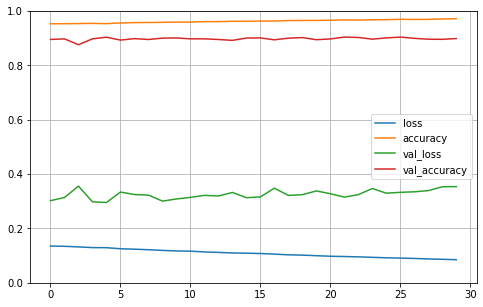

In [63]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [64]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3968 - accuracy: 0.8903


[0.3967524766921997, 0.8902999758720398]

In [65]:
x_new = x_test[:3]

In [66]:
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [67]:
y_pred = model.predict_classes(x_new)
y_pred

C:\Users\Joskar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

AxesImage(54,36;334.8x217.44)


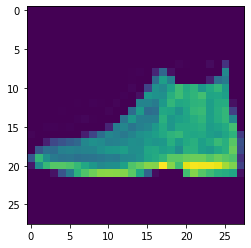

In [58]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


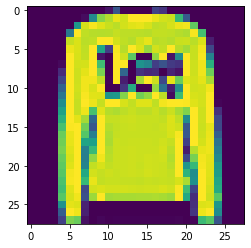

In [59]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


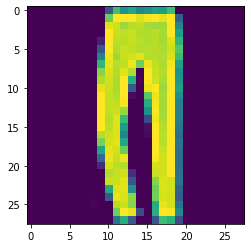

In [60]:
print(plt.imshow(x_test[2]))